Demonstration of QSVT matrix inversion circuits.

Cambridge Consultants 2024\
Walden Killick

The final ingredient in matrix inversion by QSVT is to find a low-degree polynomial approximation to $1/x$ and the corresponding phase angles which enact this polynomial, resulting in (approximately) the transformation
$$
\begin{bmatrix} A & \cdot \\\ \cdot & \cdot \end{bmatrix}
\xrightarrow{\text{QSVT}}
\begin{bmatrix} A^{-1} & \cdot \\\ \cdot & \cdot \end{bmatrix}.
$$

The pyqsp package provides both the desired polynomials and the ability to find the corresponding phase angles.

In [6]:
import numpy as np
import pyqsp
from pyqsp.angle_sequence import Polynomial, QuantumSignalProcessingPhases

from qce24_qre_challenge.circuit import QSVT, BlockEncoding
from qce24_qre_challenge.quantum_oracle import BandedCirculantOracle
from qce24_qre_challenge.sparse_matrix import BandedCirculantMatrix

We begin by creating a `BlockEncoding` object as before.

In [7]:
size = 8
matrix = BandedCirculantMatrix(size)
banded_circulant_oracle = BandedCirculantOracle(matrix)
block_encoding = BlockEncoding(banded_circulant_oracle)

Additionally, we define an initial state, i.e. the $\ket{b}$ vector in $A\ket{x}=\ket{b}$. For demonstratory purposes we take this to be a random unit vector.

In [8]:
b = np.random.rand(size)
b /= np.linalg.norm(b)

Now we use pyqsp to find the desired phase angles.

In [9]:
# Finding a polynomial approximation to 1/x
poly_generator = pyqsp.poly.PolyOneOverX()
poly_coefs = poly_generator.generate(kappa=3, epsilon=0.1)
poly = Polynomial(poly_coefs)

# Finding the phase angles which implement this polynomial
phase_angles = QuantumSignalProcessingPhases(
    poly, signal_operator="Wx", method="laurent", measurement="x"
)

b=30, j0=14
[PolyOneOverX] minimum [-3.5325637] is at [-0.20530335]: normalizing
[PolyOneOverX] bounding to 0.5
[pyqsp.PolyOneOverX] pcoefs=[ 0.00000000e+00  4.24568213e+00  0.00000000e+00 -6.14813187e+01
  0.00000000e+00  5.70160728e+02  0.00000000e+00 -3.77110116e+03
  0.00000000e+00  1.86774294e+04  0.00000000e+00 -7.07245446e+04
  0.00000000e+00  2.06037512e+05  0.00000000e+00 -4.61025085e+05
  0.00000000e+00  7.86778785e+05  0.00000000e+00 -1.01130011e+06
  0.00000000e+00  9.59305607e+05  0.00000000e+00 -6.49556764e+05
  0.00000000e+00  2.96436030e+05  0.00000000e+00 -8.15921088e+04
  0.00000000e+00  1.02215704e+04]


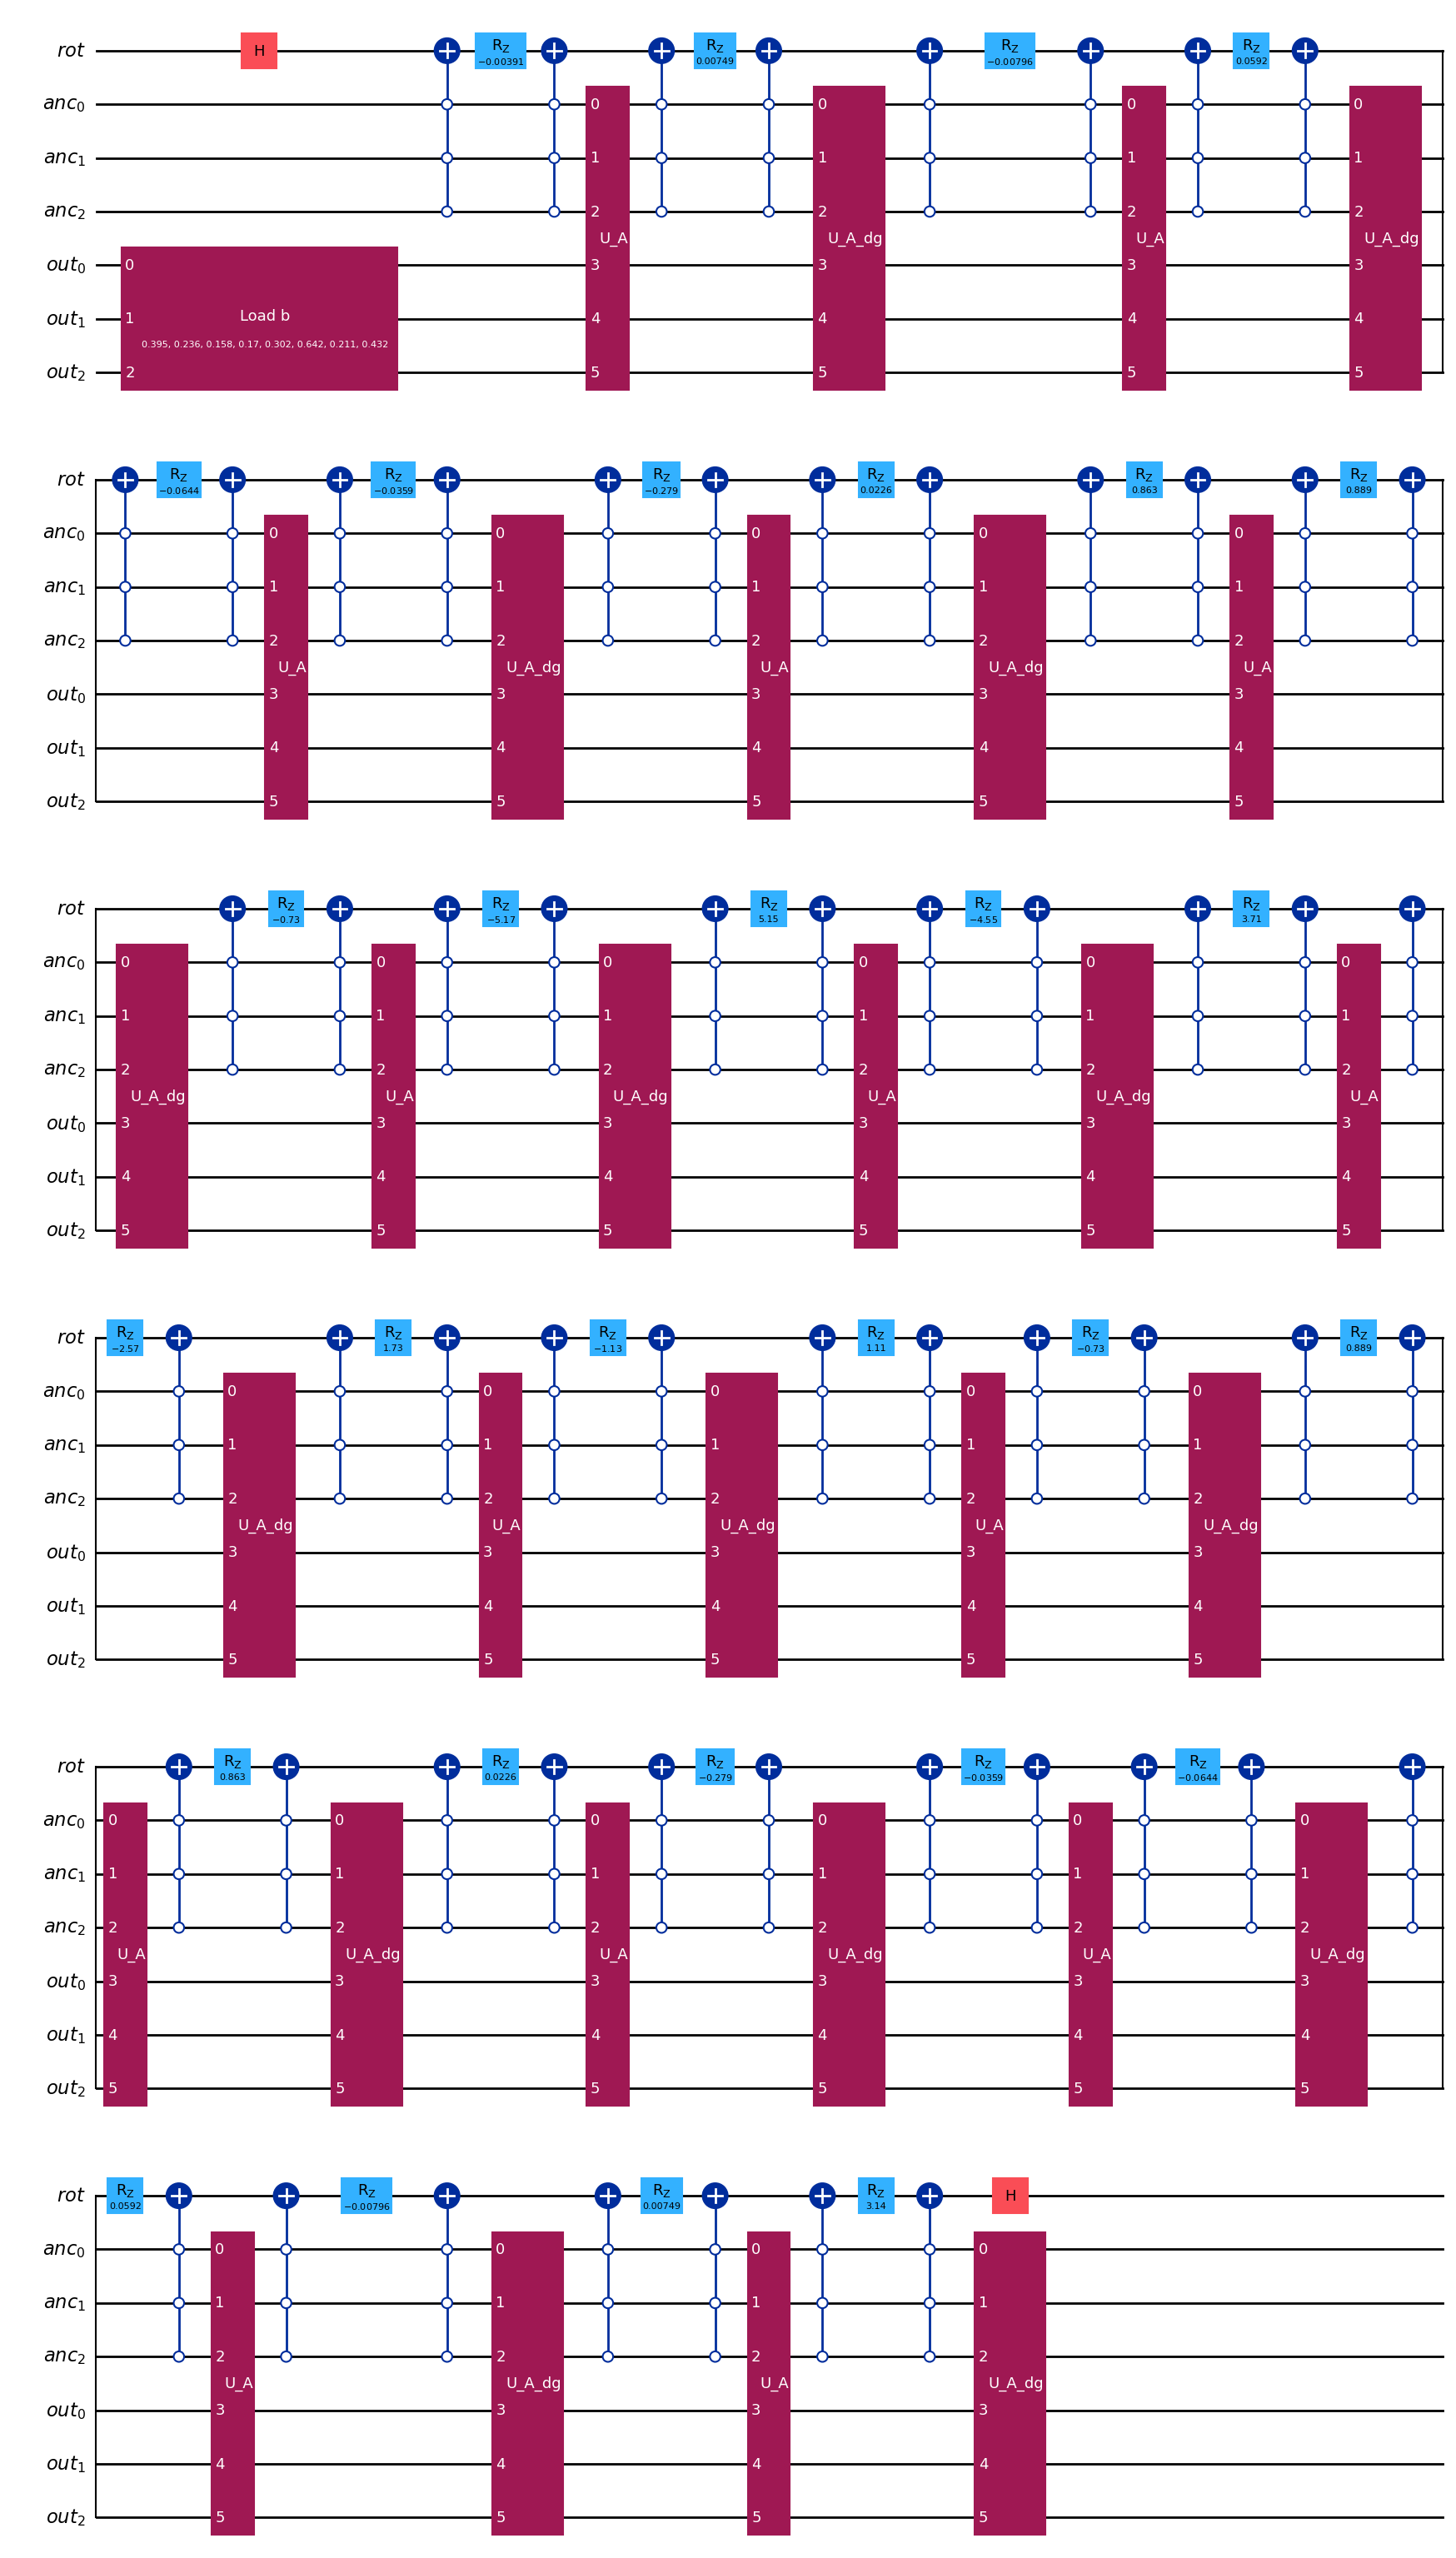

In [10]:
qsvt = QSVT(block_encoding, phase_angles, b)
qsvt_circuit = qsvt.create_circuit()

qsvt_circuit.draw('mpl')